In [24]:
#back propergation examples
import numpy as np

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

In [27]:
#pre done test bench
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)

In [28]:
#result of pre done test
print(nR)

[[ 5.10854558  2.58813132  4.68323385  1.03263075]
 [ 3.91171605  1.98616044  3.70943128  0.99323048]
 [ 1.09137096  0.65590849  3.90421566  4.986758  ]
 [ 0.95426781  0.56554462  3.18916733  3.99166798]
 [ 3.05786521  1.62169746  4.84730039  3.97316545]]


In [29]:
#print off all the games
statsFile = open("baseball2016.txt", "r")
i = 0
for line in statsFile:
    homeTeam = ""
    awayTeam = ""
    i=0
    token = line.split(',')
    for str in token:
        if ((i == 3) or (i == 6)):   #find the word i want
            noQuotes = str.split('"')
            if (i == 3): awayTeam = noQuotes[1]
            if (i == 6): homeTeam = noQuotes[1]
        if (i == 9): print(awayTeam + ": " + str)
        if (i == 10): 
            print(homeTeam + ": " + str)
            print('-------')
        i += 1
        
statsFile.close()



NYN: 3
KCA: 4
-------
TOR: 5
TBA: 3
-------
SLN: 1
PIT: 4
-------
CHN: 9
ANA: 0
-------
MIN: 2
BAL: 3
-------
CHA: 4
OAK: 3
-------
TOR: 5
TBA: 3
-------
SEA: 2
TEX: 3
-------
COL: 10
ARI: 5
-------
WAS: 4
ATL: 3
-------
PHI: 2
CIN: 6
-------
SFN: 12
MIL: 3
-------
LAN: 15
SDN: 0
-------
CHN: 6
ANA: 1
-------
BOS: 6
CLE: 2
-------
NYN: 2
KCA: 0
-------
HOU: 5
NYA: 3
-------
CHA: 5
OAK: 4
-------
TOR: 2
TBA: 3
-------
SEA: 10
TEX: 2
-------
COL: 6
ARI: 11
-------
DET: 8
MIA: 7
-------
SFN: 2
MIL: 1
-------
SLN: 5
PIT: 6
-------
LAN: 3
SDN: 0
-------
MIN: 2
BAL: 4
-------
BOS: 6
CLE: 7
-------
HOU: 6
NYA: 16
-------
CHA: 1
OAK: 2
-------
TOR: 3
TBA: 5
-------
SEA: 9
TEX: 5
-------
COL: 4
ARI: 3
-------
WAS: 3
ATL: 1
-------
PHI: 2
CIN: 3
-------
DET: 7
MIA: 3
-------
SFN: 3
MIL: 4
-------
SLN: 1
PIT: 5
-------
LAN: 7
SDN: 0
-------
TEX: 3
ANA: 4
-------
MIN: 2
BAL: 4
-------
HOU: 5
NYA: 8
-------
CHA: 6
OAK: 1
-------
CHN: 14
ARI: 6
-------
PHI: 6
CIN: 10
-------
LAN: 6
SFN: 12
-------
M

In [7]:
#print off all the games
statsFile = open("baseball2016.txt", "r")
i = 0
topArray = []
sideArray = []

'''
30 teams -> 30 rows and 30 cols
each match up has an array of scores that align
set all to -1 because that means they game didnt happen
'''
sc = np.zeros((30,30,30), np.int32) 
sc[:,:,:] = -1

#################
def addScore(team1, team2, score1, score2):
    '''
    for a team in top array, the index in the array corrisponds to the matrix column there located in
    for a team in side array, the index in the array corrisponds to the matrix row there located in
    '''
    #team 1 score entry
    try:
        row = sideArray.index(team2)

    except:
        sideArray.append(team2)
        row = sideArray.index(team2)

    try:
        col = topArray.index(team1)
    except:
        topArray.append(team1)
        col = topArray.index(team1)
    temp = sc[row, col]
    counter = 0
    for e in temp:
        if (e == -1):
            temp[counter] = score1
            break
        counter += 1
    sc[row, col] = temp
    
    #team 2 score entry
    try:
        row = sideArray.index(team1)

    except:
        sideArray.append(team1)
        row = sideArray.index(team1)

    try:
        col = topArray.index(team2)
    except:
        topArray.append(team2)
        col = topArray.index(team2)
    temp = sc[row, col]
    counter = 0
    for e in temp:
        if (e == -1):
            temp[counter] = score2
            break
        counter += 1
    sc[row, col] = temp
#####################
#parse the text file
for line in statsFile:
    homeTeam = ""
    awayTeam = ""
    homeScore = 0
    awayScore = 0
    i=0
    token = line.split(',')  #tokenize the string
    '''
    away team name @ i =3
    home team name @ i = 6
    away score @ i = 9
    home score @ i = 10
    '''
    for str in token:
        if ((i == 3) or (i == 6)):   #find the word i want
            noQuotes = str.split('"')
            if (i == 3): awayTeam = noQuotes[1]
            if (i == 6): homeTeam = noQuotes[1]
        if (i == 9): 
            awayScore = str
            print(awayTeam + ": " + awayScore + " (away)")
        if (i == 10): 
            homeScore = str
            print(homeTeam + ": " + homeScore + " (home) ")
            print('-------')
        i += 1
    addScore(homeTeam, awayTeam, homeScore, awayScore)

def getScore(team1, team2, gameSelect = None):
    print(team1, team2)
    try:
        score1 = sc[sideArray.index(team2), topArray.index(team1)]
        score2 = sc[sideArray.index(team1), topArray.index(team2)]
        if (gameSelect == None):
            print(team1, score1)
            print(team2, score2)
        else:
            print(team1, score1[gameSelect])
            print(team2, score2[gameSelect])
    except:
        print('Invalid input of teams')
    
statsFile.close()

NYN: 3 (away)
KCA: 4 (home) 
-------
TOR: 5 (away)
TBA: 3 (home) 
-------
SLN: 1 (away)
PIT: 4 (home) 
-------
CHN: 9 (away)
ANA: 0 (home) 
-------
MIN: 2 (away)
BAL: 3 (home) 
-------
CHA: 4 (away)
OAK: 3 (home) 
-------
TOR: 5 (away)
TBA: 3 (home) 
-------
SEA: 2 (away)
TEX: 3 (home) 
-------
COL: 10 (away)
ARI: 5 (home) 
-------
WAS: 4 (away)
ATL: 3 (home) 
-------
PHI: 2 (away)
CIN: 6 (home) 
-------
SFN: 12 (away)
MIL: 3 (home) 
-------
LAN: 15 (away)
SDN: 0 (home) 
-------
CHN: 6 (away)
ANA: 1 (home) 
-------
BOS: 6 (away)
CLE: 2 (home) 
-------
NYN: 2 (away)
KCA: 0 (home) 
-------
HOU: 5 (away)
NYA: 3 (home) 
-------
CHA: 5 (away)
OAK: 4 (home) 
-------
TOR: 2 (away)
TBA: 3 (home) 
-------
SEA: 10 (away)
TEX: 2 (home) 
-------
COL: 6 (away)
ARI: 11 (home) 
-------
DET: 8 (away)
MIA: 7 (home) 
-------
SFN: 2 (away)
MIL: 1 (home) 
-------
SLN: 5 (away)
PIT: 6 (home) 
-------
LAN: 3 (away)
SDN: 0 (home) 
-------
MIN: 2 (away)
BAL: 4 (home) 
-------
BOS: 6 (away)
CLE: 7 (home) 
----

In [37]:
getScore('NYN', 'TOR', gameSelect = 0)    #search for the score between any matchup

('NYN', 'TOR')
('NYN', -1)
('TOR', -1)


In [46]:
#find the average score between all match ups. if -1 then game never happened
am = np.zeros((30,30), np.float32) 
for col in range(len(sc[:,0])):   #depth
    for row in range(len(sc[0, :])):  #width
        tempScore = sc[row, col]
        avgScore = 0.0
        count = 0.0
        for j in tempScore:
            print(tempScore)
            if (j != -1):
                avgScore += j
                count += 1
            else:
                break
        try:
            avgScore = avgScore / count
        except:
            avgScore = -1
        am[row, col] = avgScore
        

[ 4  0  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 4  0  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 4  0  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 4  0  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 4  0  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 2  3  2  3  4  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 2  3  2  3  4  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 2  3  2  3  4  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 2  3  2  3  4  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
[ 2  3  2  3  4  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

In [51]:
#use am matrix to get avg score values
def getAvgScore(team1, team2):
    try:
        score1 = am[sideArray.index(team2), topArray.index(team1)]
        score2 = am[sideArray.index(team1), topArray.index(team2)]
        print(team1, score1)
        print(team2, score2)        
    except:
        print('Invalid input of teams')

In [71]:
getScore('COL', 'ARI')  #get the scores between any two teams

('COL', 'ARI')
('COL', array([10,  6,  4,  9,  5,  6,  5,  1,  8,  6,  9, 11,  9, 14,  4,  5,  9,
        4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32))
('ARI', array([ 5, 11,  3,  0,  2,  3, 10,  5,  7,  7, 10,  6,  7,  7,  9,  8, 12,
       11, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32))


In [77]:
getAvgScore('TOR', 'TBA')  #get the average of those scores

('TOR', 3.7368422)
('TBA', 5.2105265)


In [75]:
#Trying to plt the matrix - needs some work though
import matplotlib.pyplot as plt

plt.imshow(am, interpolation='none', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

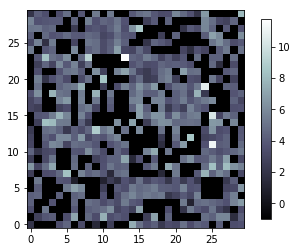

In [76]:
plt.show()